In [94]:
import pandas as pd
print('Pandas version:', pd.__version__)
url_iris = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_df = pd.read_csv(url_iris, names=names)
iris_df.head()

Pandas version: 0.25.1


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [120]:
iris_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from numpy import array
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

In [97]:
#pentru simplitate se prefera folosirea functiilor puse la dispozitie de pachetul sklearn. Se pot tousi folosi datele din
# dataframe incarcate anterior.
from sklearn.datasets import load_iris
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [118]:
X = iris.data
print(X[0:5, :])


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [99]:
y = iris.target
print(y)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, shuffle=True)
print(y_test)

[1 2 2 0 1 0 2 0 2 2 0 2 1 0 0 1 2 2 2 0 1 2 2 0 0 1 0 2 0 0 0 0 0 2 1 2 1
 0 1 0 2 2 0 1 2 2 0 2 0 0]


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, shuffle=True, random_state=42)
print(y_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]


In [102]:
from collections import Counter

print(Counter(y_train))
print(Counter(y_test))

Counter({1: 35, 2: 34, 0: 31})
Counter({0: 19, 2: 16, 1: 15})


In [103]:
import matplotlib.pyplot as plt
import numpy as np

print(f'np.__version__={np.__version__}')

np.__version__=1.16.5


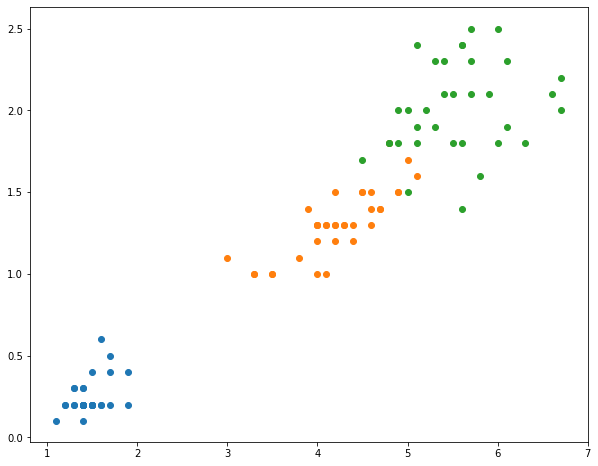

In [104]:
plt.figure(figsize=(10, 8))
for index, name in enumerate(iris.target_names):
    that_iris = X_train[y_train == index, :]
    plt.scatter(that_iris[:, 2], that_iris[:, 3])
plt.show()

In [105]:
from ipywidgets import interactive


In [106]:
def show_iris_2d(col1, col2):
    """Plots the iris dataset, only those features given by params col1 and col2.
    :param col1: index of fisrt feature to show, 0 to 3
    :param col2: index of second feature to show, 0 to 3
    :return: None
    """
    plt.figure(figsize=(10, 8))
    for index, name in enumerate(iris.target_names):
        that_iris = X_train[y_train == index, :]
        plt.scatter(that_iris[:, col1], that_iris[:, col2])
        plt.xlabel(names[col1])
        plt.ylabel(names[col2])
    plt.show()
    
interactive(show_iris_2d, col1=(0, 3), col2=(0, 3))

interactive(children=(IntSlider(value=1, description='col1', max=3), IntSlider(value=1, description='col2', ma…

In [107]:
from sklearn.neighbors import KNeighborsClassifier


In [108]:
model = KNeighborsClassifier(n_neighbors=1)


In [109]:
model.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [110]:
X_train[0, :], y_train[0]


(array([5.7, 2.9, 4.2, 1.3]), 1)

In [111]:
#prezicere pentru o singura masuratoare (4 valori)
to_predict = np.array([5.5, 2.8, 4.3, 1.0]).reshape(1, -1)
model.predict(to_predict)

array([1])

In [112]:
y_hat = model.predict(X_test)
print(y_hat)
print(y_test)

print(sum(y_hat != y_test))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]
1


In [113]:
model_5 = KNeighborsClassifier(n_neighbors=5)
model_5.fit(X_train, y_train)
y_hat_5 = model_5.predict(X_test)
print(sum(y_hat_5 != y_hat))

0


In [114]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='sag', multi_class='multinomial', max_iter=10000)
logreg.fit(X_train, y_train)
y_hat_logreg = logreg.predict(X_test)

In [115]:
#acuratetea
sum(y_hat_logreg != y_test)

0